<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #7 : Simple Linear Regression - Model Assumptions

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Nutrition Data

Consider the following data collected on a variety of menu items from various fast-food restaurants.  
<table>
  <tr>
    <td width='50%'>
      <ul>
          <li>Restaurant: Name of restaurant</li>
          <li>Item: Menu item</li>
          <li>Type: Type of menu item, e.g. sub, pizza, wrap, sandwich, etc</li>
          <li>Breakfast: Is this primarily a breakfast item</li>
          <li>ServingSize: Serving Size</li>
          <li>Calories: Calories per serving</li>
          <li>TotalFat: Total fat per serving</li>
          <li>SaturatedFat: Saturated fat per serving</li>
          <li>Cholesterol: Cholesterol per serving</li>
          <li>Sodium: Sodium per serving</li>
          <li>TotalCarbs: Total carbs per serving</li>
          <li>Fiber: Fiber per serving</li>
          <li>Sugar: Sugar per serving</li>
          <li>Protein: Protein per serving</li>
        </ul>
    </td>
  <td width='50%'>
 
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1od0unQ8y1mSNiuBPX3gSUBG6QDIDnXBD" width='50%' height='50%'></img></p>

  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [3]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

## Read in the data

In [8]:
#@title Read in Data

# Reading data in using read_csv 
Nutrition <- read_csv("http://www.StatsClass.org/stat360/Datasets/Nutrition.csv")

Rows: 196 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Restaurant, Item, Type, Breakfast
dbl (10): ServingSize, Calories, TotalFat, SaturatedFat, Cholesterol, Sodium...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



View the first few rows of the FindCars data.frame.

In [9]:
#@title View the first few rows of data
head(Nutrition)

Restaurant,Item,Type,Breakfast,ServingSize,Calories,TotalFat,SaturatedFat,Cholesterol,Sodium,TotalCarbs,Fiber,Sugar,Protein
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Subway,BLT,Sub,No,151,320,9.0,4,20,680,43,5,6,15
Subway,Black Forest Ham,Sub,No,221,290,4.5,1,25,830,46,5,8,18
Subway,Buffalo Chicken,Sub,No,269,420,15.0,3,55,1130,46,5,8,25
Subway,Chicken Bacon Ranch Melt,Sub,No,293,570,28.0,10,95,1080,47,5,8,35
Subway,Cold Cut Combo,Sub,No,235,370,13.0,4,50,1140,46,5,7,18
Subway,Italian BMT,Sub,No,228,410,16.0,6,45,1300,46,5,8,20


## Obtain the desired subset of data

The model to be fit to data that meet the following conditions.  A filter() can be used in subset the data.


*    Restaurant = Wendys



In [18]:
Wendys <- (Nutrition
  %>% filter(Restaurant == "Wendys")
  %>% select(Restaurant, Item, SaturatedFat, Calories)
)

Before preceding, check the data.frame to ensure that the filtering/selecting was done correctly.

In [19]:
Wendys

Restaurant,Item,SaturatedFat,Calories
<chr>,<chr>,<dbl>,<dbl>
Wendys,Daves Hot N Juicy 1/4 lb Single,14.0,580
Wendys,Daves Hot N Juicy 1/2 lb Double,21.0,800
Wendys,Daves Hot N Juicy 3/4 lb Triple,30.0,1060
Wendys,Baja Salad Half Size,10.0,470
Wendys,Asiago Ranch Chicken Club,12.0,740
Wendys,Baconator,27.0,970
Wendys,Baconator Single,17.0,660
Wendys,Son of Baconator,18.0,700
Wendys,Jr Bacon Cheeseburger,9.0,400


Use nrow() to determine how many food items will be used to fit the simple linear regression model.

In [24]:
nrow(Wendys)

[1] 28

## Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: SaturatedFat</li>
  <li><strong>Independent / Predictor Variable</strong>: Calories</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(SaturatedFat | Calories, Resturant = Wendys) = \beta_{0} + \beta_{1} * Calories$</li>
  <li>$Var(SaturatedFat | Calories, Resturant = Wendys) = \sigma^{2}$</li>
</ul></ul>

## Simple Linear Regression - Scatterplot

The following code can be used to to create a scatterplot and include simple linear regression line.

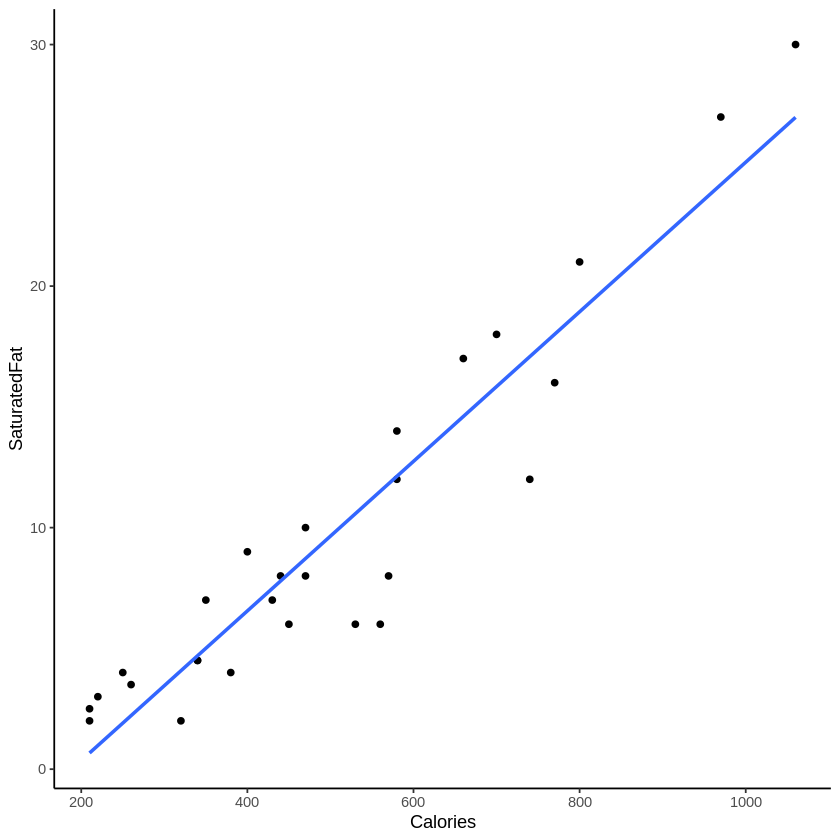

In [25]:
#@title Scatterplot with simple linear regression line
ggplot(data=Wendys, aes(x=Calories,y=SaturatedFat)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

## Fitting the Model

In [28]:
#@title Fitting the simple linear regression model
Wendys_Model <- lm(SaturatedFat ~ Calories, data=Wendys)

In [29]:
#@title Getting a summary of the model
summary(Wendys_Model)


Call:
lm(formula = SaturatedFat ~ Calories, data = Wendys)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5057 -1.9513  0.7454  2.0320  3.0130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.833332   1.208443  -4.827 5.30e-05 ***
Calories     0.030963   0.002205  14.044 1.19e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.564 on 26 degrees of freedom
Multiple R-squared:  0.8835,	Adjusted R-squared:  0.8791 
F-statistic: 197.2 on 1 and 26 DF,  p-value: 1.19e-13


Getting the 95% Confidence Interval for parameters in the model, i.e. $\beta_{0}$ and $\beta_{1}$ 

In [36]:
confint(Wendys_Model)

,2.5 %,97.5 %
(Intercept),-8.31732270,-3.34934221
Calories,0.02643087,0.03549421


## Verifying Assumption

To verify the assumptions, the predicted values and residuals from the fit are needed.  The predict() function can be used to obtain a prediction.  However, the linear model object in R contains the predicted values (or fitted values) and residuals for all observations used to build the model.

*   Predicted Values: Wendys_Model\$fitted.values
*   Residuals: Wendys_Model\$residuals


In [38]:
names(Wendys_Model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

First, lets create tidy data.frame that includes the predicted values and residuals for each observation used to construct the model.

In [ ]:
Wendys <- (Wendys
              %>% mutate(
                           Predicted_Values = Wendys_Model$fitted.values,
                           Residuals = Wendys_Model$residuals
                        )
              )


### Assumption:  Correct Form

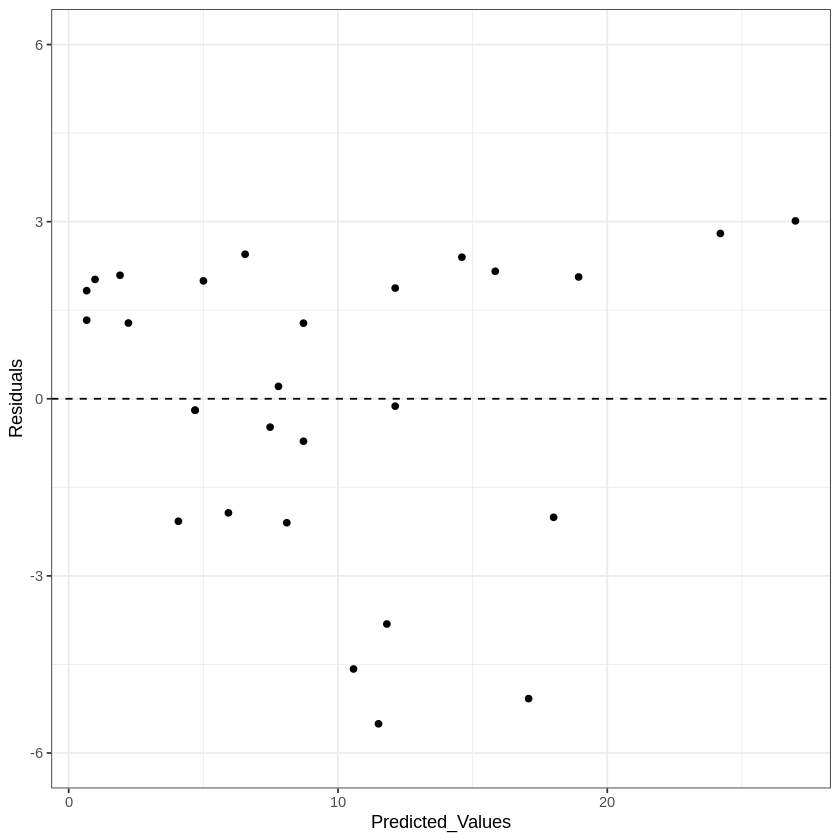

In [63]:
#@title Getting the Residuals vs Predicted Values plot
ggplot(data=Wendys, aes(x=Predicted_Values,y=Residuals)) + 
  geom_point() + 
  geom_hline(yintercept=0, linetype="dashed") +
  ylim(-6, 6) +   
  theme_bw()

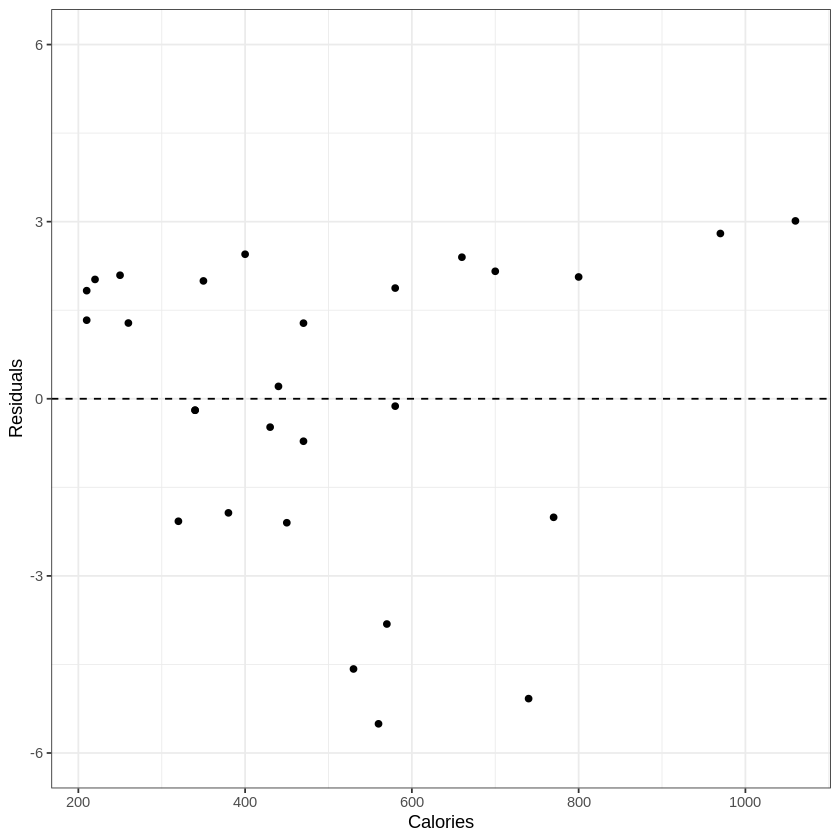

In [64]:
#@title Getting the Residuals vs Calories plot
ggplot(data=Wendys, aes(x=Calories,y=Residuals)) + 
  geom_point() + 
  geom_hline(yintercept=0, , linetype="dashed") +
  ylim(-6, 6) +   
  theme_bw()

An sufficient alternative to constructing the above ggplot is to simply pass the linear model object through the basic plot() function in R.  Specify which=1 for the Residuals vs Predicted plot.

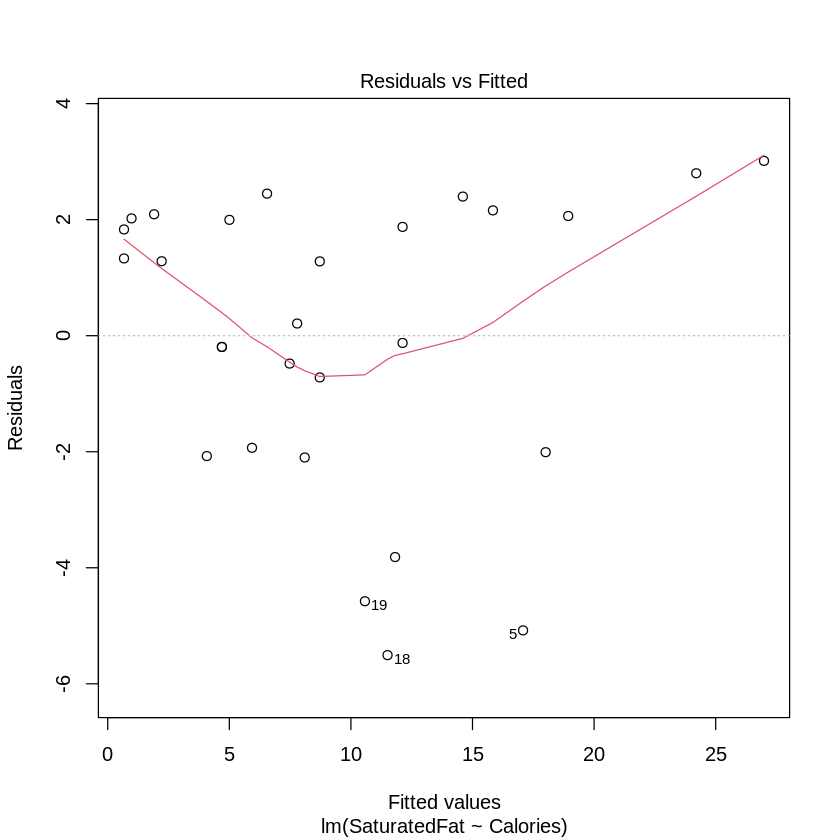

In [48]:
plot(Wendys_Model, which=1)

### car Package for Regression

The **car** package is a nice R package that can be used to assist you with doing a complete regression analysis.  This R package includes functions to accompany J. Fox and S. Weisberg book titled "An R Companion for Applied Regression.

Source:  [Webpage](tinyurl.com/carbook) for An R Companion for Applied Regression

**Note**:  The car package does take some time to download into Google Colab.

In [ ]:
#@title Load car package
#load car package
install.packages("car")
library(car)

The car pacakge includes a function called durbinWatsonTest() that can be used to check the **independence** assumption of a liner model. 

In [68]:
durbinWatsonTest(Wendys_Model)

 lag Autocorrelation D-W Statistic p-value
   1       0.2677706      1.424273   0.074
 Alternative hypothesis: rho != 0

### Assumption: Normality

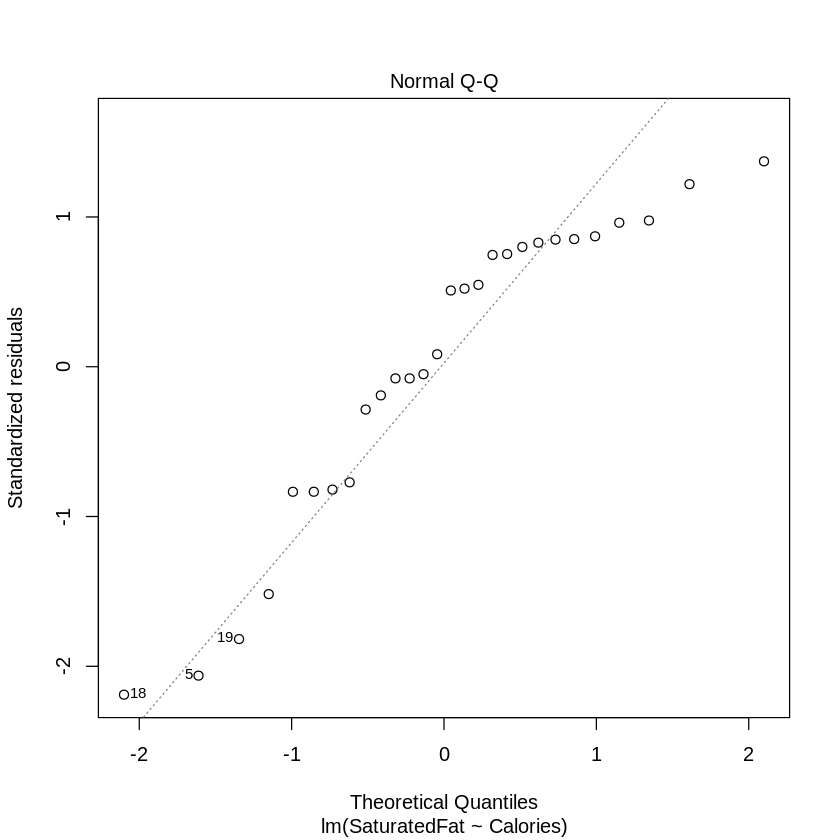

In [72]:
plot(Wendys_Model, which=2)

[1]  5 18

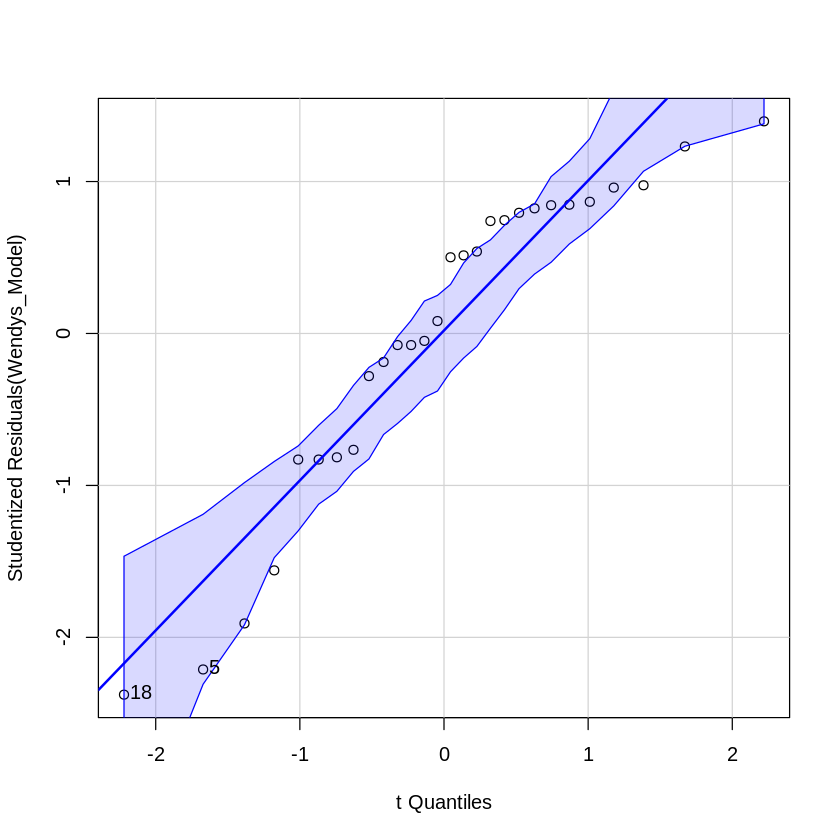

In [74]:
#@title Getting the qqplot from the car package
#The qqplot() function is from the car package
qqPlot(Wendys_Model)

Getting a histogram of the residuals with the addition of the kernal smoother.

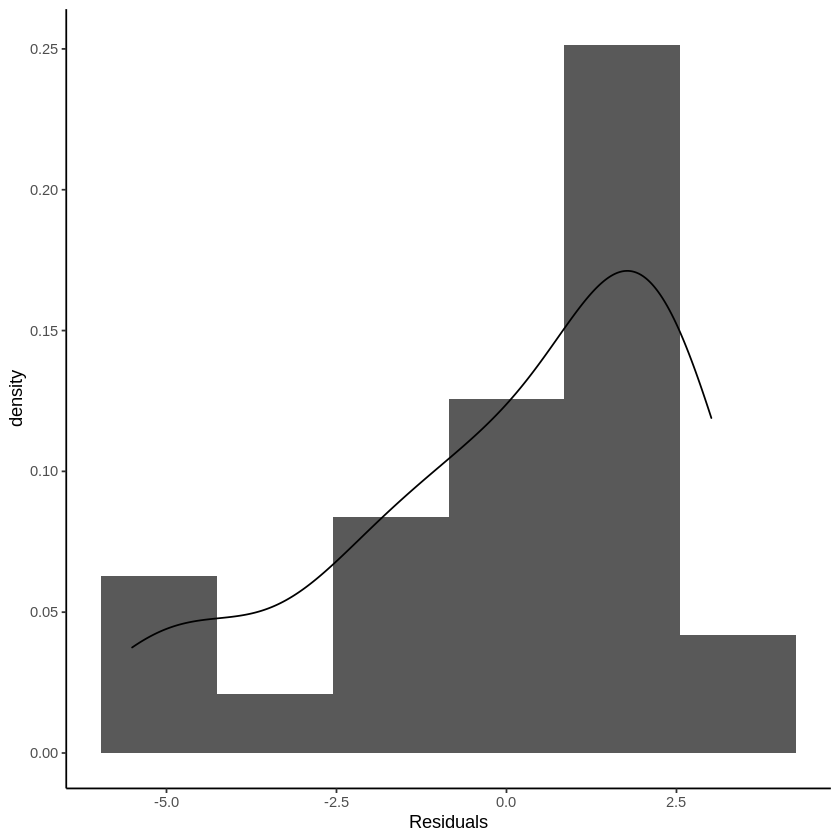

In [85]:
#@title Histogram of Residuals with kernal smoother
ggplot(data=Wendys, aes(x=Residuals)) + 
  geom_histogram(aes(y=..density..), bins=6) + 
  geom_density() +
  theme_classic()

## Outlier Detection

In [95]:
Wendys_Model$residuals

1          2          3          4          5          6          7 
 1.8750594  2.0633007  3.0130403  1.2809388 -5.0789470  2.7996689  2.3980562 
         8          9         10         11         12         13         14 
 2.1595546  2.4483166  1.9964435  2.0926975  2.0215737 -2.0998104  1.2830721 
        15         16         17         18         19         20         21 
-0.4805596 -0.1939311 -1.9324326 -5.5056898 -4.5768136 -0.1939311 -3.8153152 
        22         23         24         25         26         27         28 
 0.2098150 -2.0078231  1.3311991 -0.7190612 -0.1249406 -2.0746803  1.8311991

An approximate rule for determining outliers is $$ |Residual| >  2 *RMSE$$

The which() function can be used to identify any observations that are outliers.

In [96]:
#Identify rows that are outliers...
#The RMSE value from our model is 2.564
which( abs(Wendys_Model$residuals) > 2 * 2.564) 

18 
18

The following can be used to identify the item (row = 18) from the original data.frame. 

In [97]:
Wendys[18,]

Restaurant,Item,SaturatedFat,Calories,Predicted_Values,Residuals
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Wendys,Home Style Chicken Fillet,6,560,11.50569,-5.50569


End of Document